<a href="https://colab.research.google.com/github/parveen180/Machine-learning-project-python/blob/main/DL_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [21]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [22]:
type(x_train)

numpy.ndarray

In [23]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

training data=60,000images

test data=10,000 images

image dimension =28*28[link text](https://)

In [24]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [25]:
x_train[10].shape

(28, 28)

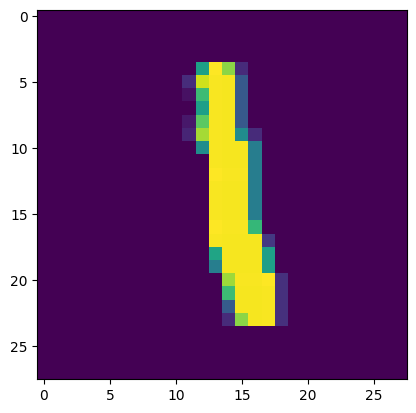

1


In [26]:
plt.imshow(x_train[6])
plt.show()

print(y_train[6])

In [27]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [28]:
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]


one hot encoding

In [29]:
x_train=x_train/255
x_test=x_test/255

In [30]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building Neural Network

In [31]:
#setting layers of neural network
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')])

#[0 1 2 3 4 5 6 7 8 9] -10 classes so 10 neurons in output layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
#compiling neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
#training neural network
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8515 - loss: 0.5205
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9568 - loss: 0.1454
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9665 - loss: 0.1070
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9746 - loss: 0.0847
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9795 - loss: 0.0694
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9826 - loss: 0.0580
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9849 - loss: 0.0497
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9866 - loss: 0.0437
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9888 - loss: 0.0372
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9897 - loss: 0.0328


In [34]:
loss,accuracy=model.evaluate(x_train,y_train)
print(accuracy)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 974us/step - accuracy: 0.9817 - loss: 0.0556
0.9822166562080383


In [35]:
#accuracy on test data
loss,accuracy=model.evaluate(x_test,y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9627 - loss: 0.1520
0.9675999879837036


In [36]:
x_test.shape

(10000, 28, 28)

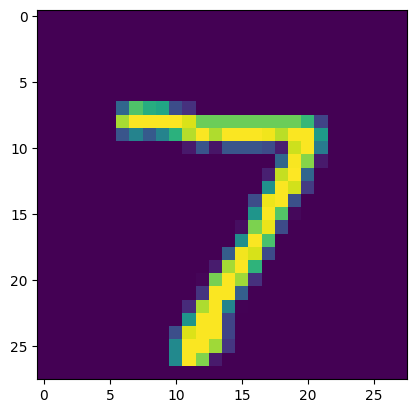

7


In [44]:
plt.imshow(x_test[0])
plt.show()

print(y_test[0])

In [45]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step


In [46]:
y_pred.shape

(10000, 10)

In [47]:
print(y_pred[0])

[6.2252238e-04 3.7282545e-05 4.0430926e-02 1.8323089e-01 8.5796761e-05
 9.4375146e-06 6.4484301e-10 1.0000000e+00 5.2461092e-04 9.8645335e-01]


model.pridct() gives the prediction probability of each class of the data point

In [59]:
#converting prediction y into labels
#argmax will give highest index in y_pred
label_for_first_test_image=int(np.argmax(y_pred[0]))
print(label_for_first_test_image)

7


In [60]:
#converting prediction probability to class label for all test data points
y_pred_labels=[int(np.argmax(i)) for i in y_pred]

In [61]:
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 7, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 8, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 5, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 7, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 7, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [64]:
print(np.concatenate([np.array(y_pred_labels).reshape(10000,1),y_test.reshape(10000,1)],axis=1))

[[7 7]
 [2 2]
 [1 1]
 ...
 [4 4]
 [5 5]
 [6 6]]


tf.Tensor(
[[ 943    0    5    2    7    1    7    5    3    7]
 [   0 1111    4    3    1    0    5    2    9    0]
 [   3    1  982    2    5    0    3   24   11    1]
 [   0    1    5  975    3    2    1   10    8    5]
 [   0    0    5    0  963    0    6    5    1    2]
 [   1    0    0   17    3  851    8    2    8    2]
 [   3    1    1    0    6    4  943    0    0    0]
 [   0    0    4    0    1    0    1 1015    2    5]
 [   0    0    3    4    5    4    4   10  940    4]
 [   1    2    0    1   25    4    1   18    4  953]], shape=(10, 10), dtype=int32)


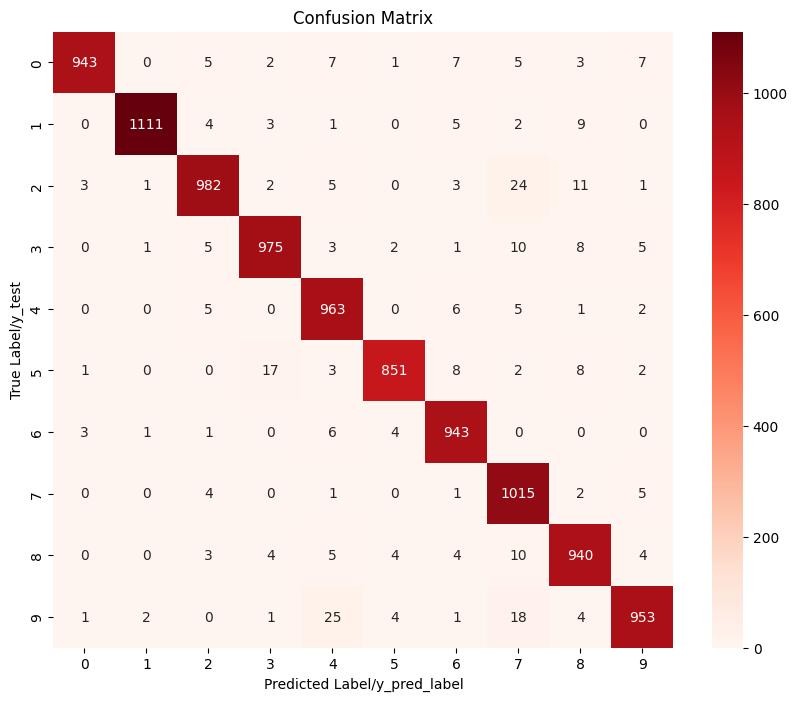

In [68]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)
print(conf_matrix)
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label/y_pred_label')
plt.ylabel('True Label/y_test')
plt.title('Confusion Matrix')
plt.show()

Building a predictive system

In [93]:
input_image_path='/content/MNIST_digit.png'
input_image=cv2.imread(input_image_path)


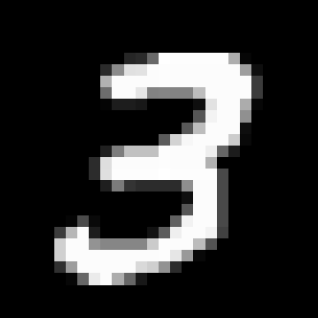

In [94]:
cv2_imshow(input_image)

In [95]:
input_image.shape

(318, 318, 3)

In [96]:
input_image=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [97]:
input_image.shape

(318, 318)

In [98]:
input_image=cv2.resize(input_image,(28,28))

In [99]:
input_image.shape

(28, 28)

In [100]:
cv2_imshow(input_image)

In [101]:
input_image=input_image/255

In [102]:
input_image=np.reshape(input_image,[1,28,28])

In [103]:
prediction=model.predict(input_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [104]:
print(prediction)

[[8.7075278e-16 4.3938530e-06 3.0494417e-07 1.0000000e+00 6.1313804e-10
  8.8127386e-03 3.4879389e-27 1.3792521e-04 9.2846220e-03 7.6696408e-01]]


In [105]:
prediction=np.argmax(prediction)
print(prediction)

3


Building predictive system

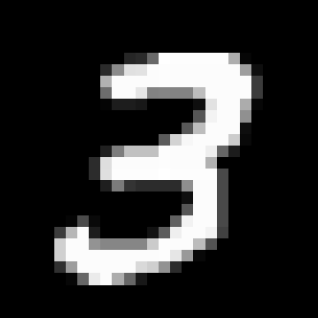

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
The handwritten digit is recignize as  3


In [107]:
input_image_path='/content/MNIST_digit.png'
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_greyscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize=cv2.resize(input_image_greyscale,(28,28))
input_image_resize=input_image_resize/255
input_image_reshaped=np.reshape(input_image_resize,[1,28,28])
prediction=model.predict(input_image_reshaped)
prediction=np.argmax(prediction)
print('The handwritten digit is recignize as ' , prediction)